## 6.0  Analysis of Credit Card Balances

> In this notebook I analyze the `credit card balance` dataset which is described below:
> - Monthly balance snapshots of previous credit cards that the applicant has had with Home Credit. Files contain one row for each month where a client has data.  The file contains 23 fields.

#### Analysis Summary:
> After analyzing the dataset I created an aggregate table of four functions ('minimum', 'maximum', 'mean','standard deviation') by `SK_ID_CURR` for each of the availble `float64` fields.  Each field would have a new column for each of the functions.  This created a total of 80 features.  By taking this approach I figure there will be many fields available during model selection that can be removed if there feature importance is zero.

In [17]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

import numpy as np

%matplotlib inline

### 6.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper 
> - Create Activity Base Table (ABT) to group the fields by type.

In [19]:
dataset = utils.get_credit_card_balance()

In [20]:
dataset.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6.00,56.97,"135,000.00",0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1.00,0.00,1.00,35.00,Active,0.00,0.00
1,2582071,363914,-1.00,"63,975.56","45,000.00","2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1.00,0.00,0.00,69.00,Active,0.00,0.00
2,1740877,371185,-7.00,"31,815.22","450,000.00",0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0.00,0.00,0.00,30.00,Active,0.00,0.00
3,1389973,337855,-4.00,"236,572.11","225,000.00","2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1.00,0.00,0.00,10.00,Active,0.00,0.00
4,1891521,126868,-1.00,"453,919.46","450,000.00",0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1.00,0.00,1.00,101.00,Active,0.00,0.00


In [21]:
abt = utils.ABT(dataset)
abt.info()

Column count: 23
--------------------
Row count: 3840312
--------------------
Types:
--------------------
Type: float64 Count: 20
Type: int64 Count: 2
Type: object Count: 1


In [22]:
float_table = abt.float_table
print("Total float64 types: {}".format(len(float_table)))
float_table 

Total float64 types: 20


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,1,"3,840,312.00",0.00,0.00,-34.52,26.67,-96.00,-55.00,-28.00,-11.00,-1.00
AMT_BALANCE,2,"3,840,312.00",0.00,0.00,"58,300.16","106,307.03","-420,250.18",0.00,0.00,"89,046.69","1,505,902.19"
AMT_CREDIT_LIMIT_ACTUAL,3,"3,840,312.00",0.00,0.00,"153,807.96","165,145.70",0.00,"45,000.00","112,500.00","180,000.00","1,350,000.00"
AMT_DRAWINGS_ATM_CURRENT,4,"3,090,496.00","749,816.00",0.20,"5,961.32","28,225.69","-6,827.31",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_CURRENT,5,"3,840,312.00",0.00,0.00,"7,433.39","33,846.08","-6,211.62",0.00,0.00,0.00,"2,287,098.31"
AMT_DRAWINGS_OTHER_CURRENT,6,"3,090,496.00","749,816.00",0.20,288.17,"8,201.99",0.00,0.00,0.00,0.00,"1,529,847.00"
AMT_DRAWINGS_POS_CURRENT,7,"3,090,496.00","749,816.00",0.20,"2,968.80","20,796.89",0.00,0.00,0.00,0.00,"2,239,274.16"
AMT_INST_MIN_REGULARITY,8,"3,535,076.00","305,236.00",0.08,"3,540.20","5,600.15",0.00,0.00,0.00,"6,633.91","202,882.01"
AMT_PAYMENT_CURRENT,9,"3,072,324.00","767,988.00",0.20,"10,280.54","36,078.08",0.00,152.37,"2,702.70","9,000.00","4,289,207.45"
AMT_PAYMENT_TOTAL_CURRENT,10,"3,840,312.00",0.00,0.00,"7,588.86","32,005.99",0.00,0.00,0.00,"6,750.00","4,278,315.69"


In [23]:
# print description of each field in the integer ABT
field_table = utils.FieldsNames()
field_table.print('credit_card_balance.csv',float_table.index.values.tolist()) 

1) ['MONTHS_BALANCE']: Month of balance relative to application date (-1 means the freshest balance date)
----------------------------------------
2) ['AMT_BALANCE']: Balance during the month of previous credit
----------------------------------------
3) ['AMT_CREDIT_LIMIT_ACTUAL']: Credit card limit during the month of the previous credit
----------------------------------------
4) ['AMT_DRAWINGS_ATM_CURRENT']: Amount drawing at ATM during the month of the previous credit
----------------------------------------
5) ['AMT_DRAWINGS_CURRENT']: Amount drawing during the month of the previous credit
----------------------------------------
6) ['AMT_DRAWINGS_OTHER_CURRENT']: Amount of other drawings during the month of the previous credit
----------------------------------------
7) ['AMT_DRAWINGS_POS_CURRENT']: Amount drawing or buying goods during the month of the previous credit
----------------------------------------
8) ['AMT_INST_MIN_REGULARITY']: Minimal installment for this month of 

In [24]:
other_table = abt.other_table
print("Total string types: {}".format(len(other_table)))
other_table 

Total string types: 1


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_STATUS,1,3840312,0,0.00,7,Active,3698436,0.96


In [25]:
# print description of each field in the string ABT
field_table = utils.FieldsNames()
field_table.print('credit_card_balance.csv',other_table.index.values.tolist()) 

1) ['NAME_CONTRACT_STATUS']: Contract status (active signed,...) on the previous credit
----------------------------------------


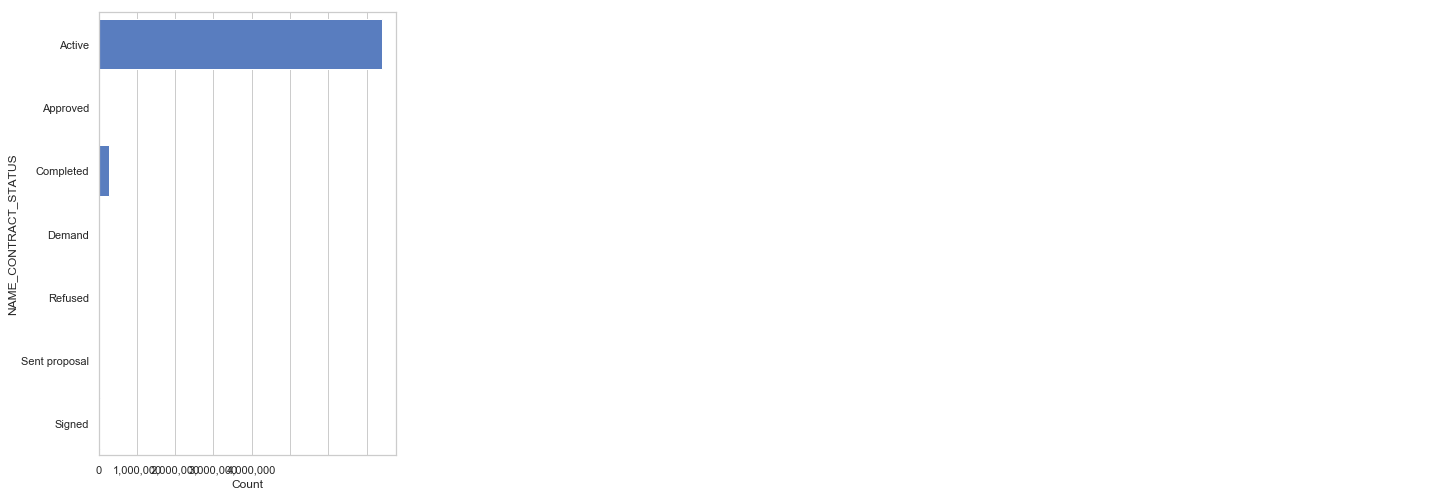

In [26]:
utils.plot_hbar(other_table.index,dataset)

### 6.2 Create Agregation Fields 
> Here I create aggregation functions fields.

In [27]:
#convert months balnce to positive befor aggregation
dataset['MONTHS_BALANCE'] = dataset['MONTHS_BALANCE'].apply(lambda x:-x)

In [28]:
#let get minimum, maximum, average and standard deviation
fun_agg = ['min', 'max', 'mean','std']

agg_fun_df = dataset.groupby('SK_ID_CURR')[float_table.index.values].agg(fun_agg)

#rename columns
agg_fun_df.columns = ["CC_{}_{}".format(c[0],c[1].upper()) for c in agg_fun_df.columns.values.tolist()] 

#let fill nan values
agg_fun_df.fillna(0,inplace=True)

In [29]:
agg_fun_df.head()

,CC_MONTHS_BALANCE_MIN,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_MONTHS_BALANCE_STD,CC_AMT_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_STD,CC_AMT_CREDIT_LIMIT_ACTUAL_MIN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,...,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_STD,CC_SK_DPD_MIN,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_STD,CC_SK_DPD_DEF_MIN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_STD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,1.00,6.00,3.50,1.87,0.00,0.00,0.00,0.00,"270,000.00","270,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
100011,2.00,75.00,38.50,21.51,0.00,"189,000.00","54,482.11","68,127.24","90,000.00","180,000.00",...,25.77,10.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
100013,1.00,96.00,48.50,27.86,0.00,"161,420.22","18,159.92","43,237.41","45,000.00","157,500.00",...,18.72,5.85,0.00,1.00,0.01,0.10,0.00,1.00,0.01,0.10
100021,2.00,18.00,10.00,5.05,0.00,0.00,0.00,0.00,"675,000.00","675,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
100023,4.00,11.00,7.50,2.45,0.00,0.00,0.00,0.00,"45,000.00","225,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
utils.ABT(agg_fun_df).float_table

,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
CC_MONTHS_BALANCE_MIN,1,"103,558.00",0.00,0.00,1.52,0.73,1.00,1.00,1.00,2.00,12.00
CC_MONTHS_BALANCE_MAX,2,"103,558.00",0.00,0.00,37.53,33.38,1.00,11.00,22.00,75.00,96.00
CC_MONTHS_BALANCE_MEAN,3,"103,558.00",0.00,0.00,19.51,16.67,1.00,6.00,12.00,38.00,50.18
CC_MONTHS_BALANCE_STD,4,"103,558.00",0.00,0.00,10.83,9.65,0.00,3.03,6.49,21.51,29.67
CC_AMT_BALANCE_MIN,5,"103,558.00",0.00,0.00,"10,542.13","44,311.66","-420,250.18",0.00,0.00,0.00,"869,873.54"
CC_AMT_BALANCE_MAX,6,"103,558.00",0.00,0.00,"142,297.93","171,325.54",0.00,0.00,"96,107.18","194,612.55","1,505,902.19"
CC_AMT_BALANCE_MEAN,7,"103,558.00",0.00,0.00,"69,973.19","107,537.81","-2,930.23",0.00,"24,997.60","96,997.75","928,686.32"
CC_AMT_BALANCE_STD,8,"103,558.00",0.00,0.00,"45,479.93","59,330.67",0.00,0.00,"26,979.45","66,616.52","586,457.60"
CC_AMT_CREDIT_LIMIT_ACTUAL_MIN,9,"103,558.00",0.00,0.00,"149,529.21","198,557.63",0.00,"9,000.00","45,000.00","202,500.00","1,350,000.00"
CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,10,"103,558.00",0.00,0.00,"249,504.88","201,189.09",0.00,"112,500.00","180,000.00","315,000.00","1,350,000.00"


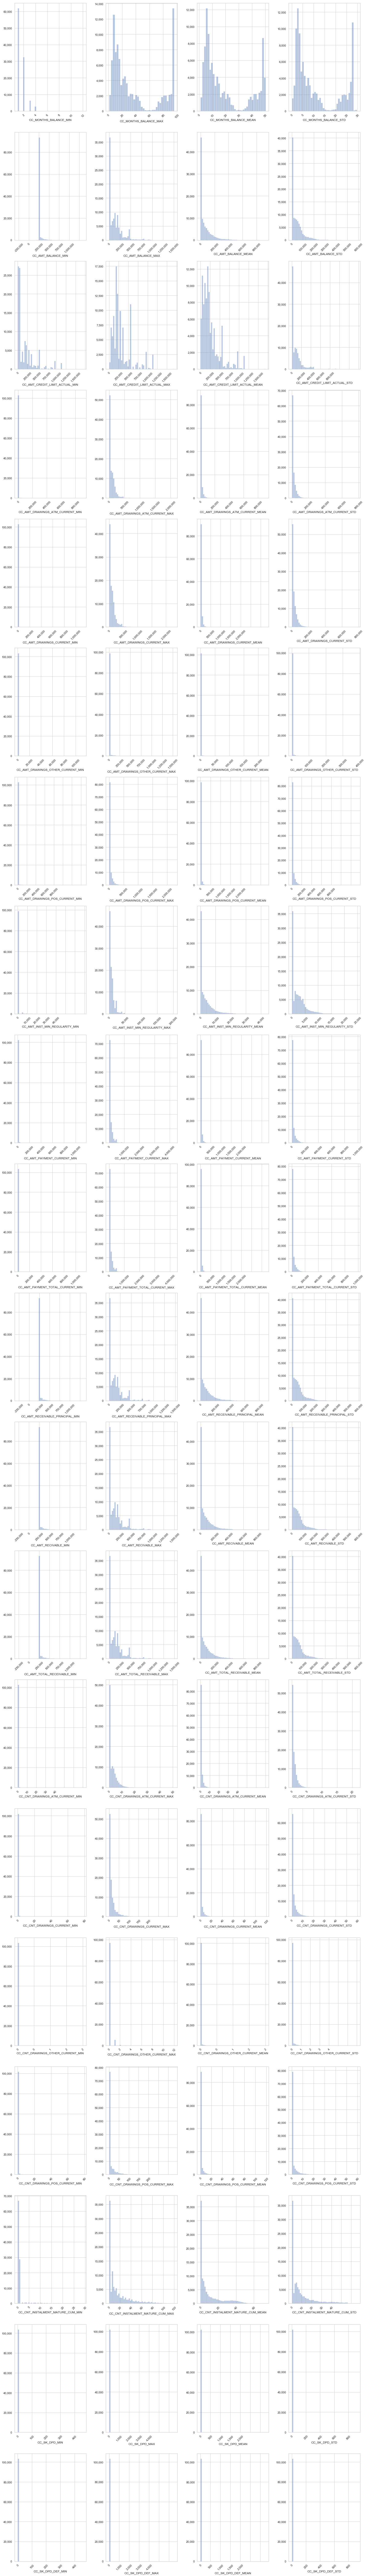

In [31]:
utils.plot_hist(agg_fun_df.columns, agg_fun_df) 

### 6.3 Save File

In [32]:
agg_fun_df.reset_index().to_csv('data_pre_processed/1_6_cc_balances.csv',index=False)